In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print("TABLE CUSTOMERS")
cst_path = "C:/Users/SALIF/Desktop/projet_1/datasets/Customers.csv"
customer_df = pd.read_csv(cst_path, encoding='ISO-8859-1')
# print(customer.head())
customers = customer_df.rename(columns={"CustomerKey": "customer_id", "Gender": "gender", "Name": "name", "State Code": "cst_state_code", "State": "cst_state", "Zip Code": "cst_zip_code", "Continent": "continent","Birthday": "birthday", "City":"cst_city","Country":"cst_country"})
print(customers.info())


TABLE CUSTOMERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     15266 non-null  int64 
 1   gender          15266 non-null  object
 2   name            15266 non-null  object
 3   cst_city        15266 non-null  object
 4   cst_state_code  15256 non-null  object
 5   cst_state       15266 non-null  object
 6   cst_zip_code    15266 non-null  object
 7   cst_country     15266 non-null  object
 8   continent       15266 non-null  object
 9   birthday        15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB
None


In [3]:
print(customers.isnull().any())

customer_id       False
gender            False
name              False
cst_city          False
cst_state_code     True
cst_state         False
cst_zip_code      False
cst_country       False
continent         False
birthday          False
dtype: bool


In [4]:
nb_nan = customers['cst_state_code'].isna().sum()  
print(f"Nombre de NaN dans la colonne est : {nb_nan}")

Nombre de NaN dans la colonne est : 10


In [5]:
print("TABLE PRODUCT")
 
prod_path= "C:/Users/SALIF/Desktop/projet_1/datasets/Products.csv"
 
product_df = pd.read_csv(prod_path, encoding='ISO-8859-1')
product = product_df.rename(columns={"ProductKey": "product_id", "Product Name": "Product_name", "Brand": "brand", "Color": "color", "Unit Cost USD": "unit_cost_USD", "Unit Price USD": "unit_price_USD", "SubcategoryKey": "subcategory_id","Subcategory": "subcategory", "CategoryKey": "Category_id", "Category":"category"})
#print(product.info())
print(product.info())

TABLE PRODUCT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      2517 non-null   int64 
 1   Product_name    2517 non-null   object
 2   brand           2517 non-null   object
 3   color           2517 non-null   object
 4   unit_cost_USD   2517 non-null   object
 5   unit_price_USD  2517 non-null   object
 6   subcategory_id  2517 non-null   int64 
 7   subcategory     2517 non-null   object
 8   Category_id     2517 non-null   int64 
 9   category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB
None


In [6]:
print(product.isnull().any())

product_id        False
Product_name      False
brand             False
color             False
unit_cost_USD     False
unit_price_USD    False
subcategory_id    False
subcategory       False
Category_id       False
category          False
dtype: bool


In [7]:
print("TABLE SALES")
 
sls_path= "C:/Users/SALIF/Desktop/projet_1/datasets/Sales.csv"
 
sales_df = pd.read_csv(sls_path, encoding='ISO-8859-1')
sales = sales_df.rename(columns={"Order Number": "order_id", "Line Item": "line_itm", "Order Date": "order_Date", "Delivery Date": "delivery_date", "CustomerKey":"customer_id", "StoreKey": "store_id","ProductKey": "product_id", "Quantity" : "qtity", "Currency Code" : "currency_id"})
#print(sales.info())
print(sales.info())

TABLE SALES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       62884 non-null  int64 
 1   line_itm       62884 non-null  int64 
 2   order_Date     62884 non-null  object
 3   delivery_date  13165 non-null  object
 4   customer_id    62884 non-null  int64 
 5   store_id       62884 non-null  int64 
 6   product_id     62884 non-null  int64 
 7   qtity          62884 non-null  int64 
 8   currency_id    62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB
None


In [8]:
print(sales.isnull().any())

order_id         False
line_itm         False
order_Date       False
delivery_date     True
customer_id      False
store_id         False
product_id       False
qtity            False
currency_id      False
dtype: bool


In [9]:
nb_nan = sales['delivery_date'].isna().sum()  
print(f"Nombre de NaN dans la colonne est : {nb_nan}")

Nombre de NaN dans la colonne est : 49719


In [10]:
sales['order_Date'] = pd.to_datetime(sales['order_Date'], format='%m/%d/%Y')
sales['delivery_date'] = pd.to_datetime(sales['delivery_date'], format='%m/%d/%Y')

In [11]:
sales['DeliveryDelay'] = sales['delivery_date'].fillna(pd.to_datetime('NaT')) - sales['order_Date']
sales['DeliveryDelay'] = sales['DeliveryDelay'].dt.days.fillna(-1)  # Remplacer NaT par -1

In [12]:
mean_delivery_delay = sales[sales['DeliveryDelay'] > -1]['DeliveryDelay'].mean()  # Pour remplacer les dates de livraison manquantes par la date de commande plus le retard moyen (en excluant les non-livraisons)

In [13]:
sales['delivery_date'] = sales.apply(
    lambda row: row['order_Date'] + pd.Timedelta(days=mean_delivery_delay) if row['DeliveryDelay'] == -1 else row['delivery_date'],
    axis=1
)

In [14]:
sales.head(20)

,order_id,line_itm,order_Date,delivery_date,customer_id,store_id,product_id,qtity,currency_id,DeliveryDelay
0,366000,1,2016-01-01,2016-01-05 12:41:56.855298139,265598,10,1304,1,CAD,-1.0
1,366001,1,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,1048,2,USD,12.0
2,366001,2,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,2007,1,USD,12.0
3,366002,1,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,1106,7,CAD,11.0
4,366002,2,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,373,1,CAD,11.0
5,366002,3,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,1080,4,CAD,11.0
6,366004,1,2016-01-01,2016-01-05 12:41:56.855298139,1107461,38,163,6,GBP,-1.0
7,366004,2,2016-01-01,2016-01-05 12:41:56.855298139,1107461,38,1529,2,GBP,-1.0
8,366005,1,2016-01-01,2016-01-05 12:41:56.855298139,844003,33,421,4,EUR,-1.0
9,366007,1,2016-01-01,2016-01-05 12:41:56.855298139,2035771,43,1617,1,USD,-1.0


In [16]:
# Print the mean delivery delay
print(f"le delai moyen de livraison est {mean_delivery_delay:.2f} days.")

le delai moyen de livraison est 4.53 days.


In [17]:
sales.head(50)

,order_id,line_itm,order_Date,delivery_date,customer_id,store_id,product_id,qtity,currency_id,DeliveryDelay
0,366000,1,2016-01-01,2016-01-05 12:41:56.855298139,265598,10,1304,1,CAD,-1.0
1,366001,1,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,1048,2,USD,12.0
2,366001,2,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,2007,1,USD,12.0
3,366002,1,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,1106,7,CAD,11.0
4,366002,2,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,373,1,CAD,11.0
5,366002,3,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,1080,4,CAD,11.0
6,366004,1,2016-01-01,2016-01-05 12:41:56.855298139,1107461,38,163,6,GBP,-1.0
7,366004,2,2016-01-01,2016-01-05 12:41:56.855298139,1107461,38,1529,2,GBP,-1.0
8,366005,1,2016-01-01,2016-01-05 12:41:56.855298139,844003,33,421,4,EUR,-1.0
9,366007,1,2016-01-01,2016-01-05 12:41:56.855298139,2035771,43,1617,1,USD,-1.0


In [18]:
print("TABLE STORE")
 
str_path= "C:/Users/SALIF/Desktop/projet_1/datasets/Stores.csv"
 
store_df = pd.read_csv(str_path, encoding='ISO-8859-1')
store = store_df.rename(columns={"StoreKey":"store_id","Country": "st_country","State" : "st_state","Square Meters": "square_meters","Open Date":"open_date"})
#print(store.info())
store.info()

TABLE STORE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   store_id       67 non-null     int64  
 1   st_country     67 non-null     object 
 2   st_state       67 non-null     object 
 3   square_meters  66 non-null     float64
 4   open_date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [19]:
print(store.isnull().any())

store_id         False
st_country       False
st_state         False
square_meters     True
open_date        False
dtype: bool


In [20]:
nb_nan = store['square_meters'].isna().sum()  
print(f"Nombre de NaN dans la colonne est : {nb_nan}")

Nombre de NaN dans la colonne est : 1


In [21]:
df_1 = pd.merge(sales, customers, how= "inner", on='customer_id')

In [22]:
df_1

,order_id,line_itm,order_Date,delivery_date,customer_id,store_id,product_id,qtity,currency_id,DeliveryDelay,gender,name,cst_city,cst_state_code,cst_state,cst_zip_code,cst_country,continent,birthday
0,366000,1,2016-01-01,2016-01-05 12:41:56.855298139,265598,10,1304,1,CAD,-1.0,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971
1,366001,1,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,1048,2,USD,12.0,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,11/20/1995
2,366001,2,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,2007,1,USD,12.0,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,11/20/1995
3,366002,1,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,1106,7,CAD,11.0,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962
4,366002,2,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,373,1,CAD,11.0,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-24 12:41:56.855298139,1216913,43,632,3,USD,-1.0,Male,Donald Woodie,Garden Grove,CA,California,92643,United States,North America,4/16/1939
62880,2243031,1,2021-02-20,2021-02-24 00:00:00.000000000,511229,0,98,4,EUR,4.0,Female,Gabriele Thalberg,Stuttgart Frauenkopf,BW,Baden-Württemberg,70184,Germany,Europe,3/10/1940
62881,2243032,1,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1613,2,CAD,3.0,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,5/25/1993
62882,2243032,2,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1717,2,CAD,3.0,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,5/25/1993


In [23]:
df_2 = pd.merge(df_1, store,how= "inner", on='store_id')

In [24]:
df_2

,order_id,line_itm,order_Date,delivery_date,customer_id,store_id,product_id,qtity,currency_id,DeliveryDelay,...,cst_state_code,cst_state,cst_zip_code,cst_country,continent,birthday,st_country,st_state,square_meters,open_date
0,366000,1,2016-01-01,2016-01-05 12:41:56.855298139,265598,10,1304,1,CAD,-1.0,...,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,Canada,Nunavut,1210.0,4/4/2015
1,366001,1,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,1048,2,USD,12.0,...,CA,California,93602,United States,North America,11/20/1995,Online,Online,NaN,1/1/2010
2,366001,2,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,2007,1,USD,12.0,...,CA,California,93602,United States,North America,11/20/1995,Online,Online,NaN,1/1/2010
3,366002,1,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,1106,7,CAD,11.0,...,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962,Online,Online,NaN,1/1/2010
4,366002,2,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,373,1,CAD,11.0,...,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962,Online,Online,NaN,1/1/2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-24 12:41:56.855298139,1216913,43,632,3,USD,-1.0,...,CA,California,92643,United States,North America,4/16/1939,United States,Alaska,1190.0,1/1/2015
62880,2243031,1,2021-02-20,2021-02-24 00:00:00.000000000,511229,0,98,4,EUR,4.0,...,BW,Baden-Württemberg,70184,Germany,Europe,3/10/1940,Online,Online,NaN,1/1/2010
62881,2243032,1,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1613,2,CAD,3.0,...,AB,Alberta,T2T 0C6,Canada,North America,5/25/1993,Online,Online,NaN,1/1/2010
62882,2243032,2,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1717,2,CAD,3.0,...,AB,Alberta,T2T 0C6,Canada,North America,5/25/1993,Online,Online,NaN,1/1/2010


In [25]:
df = pd.merge(df_2, product,how= "inner", on='product_id')

In [26]:
df

,order_id,line_itm,order_Date,delivery_date,customer_id,store_id,product_id,qtity,currency_id,DeliveryDelay,...,open_date,Product_name,brand,color,unit_cost_USD,unit_price_USD,subcategory_id,subcategory,Category_id,category
0,366000,1,2016-01-01,2016-01-05 12:41:56.855298139,265598,10,1304,1,CAD,-1.0,...,4/4/2015,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,1048,2,USD,12.0,...,1/1/2010,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,2007,1,USD,12.0,...,1/1/2010,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,$665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,1106,7,CAD,11.0,...,1/1/2010,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,373,1,CAD,11.0,...,1/1/2010,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-24 12:41:56.855298139,1216913,43,632,3,USD,-1.0,...,1/1/2015,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,$139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,2021-02-20,2021-02-24 00:00:00.000000000,511229,0,98,4,EUR,4.0,...,1/1/2010,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,$120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1613,2,CAD,3.0,...,1/1/2010,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,$109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1717,2,CAD,3.0,...,1/1/2010,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,$70.13,702,Download Games,7,Games and Toys


In [27]:
pd.set_option('display.max_columns', None)
df

,order_id,line_itm,order_Date,delivery_date,customer_id,store_id,product_id,qtity,currency_id,DeliveryDelay,gender,name,cst_city,cst_state_code,cst_state,cst_zip_code,cst_country,continent,birthday,st_country,st_state,square_meters,open_date,Product_name,brand,color,unit_cost_USD,unit_price_USD,subcategory_id,subcategory,Category_id,category
0,366000,1,2016-01-01,2016-01-05 12:41:56.855298139,265598,10,1304,1,CAD,-1.0,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,Canada,Nunavut,1210.0,4/4/2015,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,1048,2,USD,12.0,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,11/20/1995,Online,Online,NaN,1/1/2010,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,2007,1,USD,12.0,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,11/20/1995,Online,Online,NaN,1/1/2010,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,$665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,1106,7,CAD,11.0,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962,Online,Online,NaN,1/1/2010,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,373,1,CAD,11.0,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962,Online,Online,NaN,1/1/2010,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-24 12:41:56.855298139,1216913,43,632,3,USD,-1.0,Male,Donald Woodie,Garden Grove,CA,California,92643,United States,North America,4/16/1939,United States,Alaska,1190.0,1/1/2015,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,$139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,2021-02-20,2021-02-24 00:00:00.000000000,511229,0,98,4,EUR,4.0,Female,Gabriele Thalberg,Stuttgart Frauenkopf,BW,Baden-Württemberg,70184,Germany,Europe,3/10/1940,Online,Online,NaN,1/1/2010,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,$120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1613,2,CAD,3.0,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,5/25/1993,Online,Online,NaN,1/1/2010,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,$109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1717,2,CAD,3.0,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,5/25/1993,Online,Online,NaN,1/1/2010,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,$70.13,702,Download Games,7,Games and Toys


In [28]:
dup = df.duplicated().any()

In [29]:
dup

False

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        62884 non-null  int64         
 1   line_itm        62884 non-null  int64         
 2   order_Date      62884 non-null  datetime64[ns]
 3   delivery_date   62884 non-null  datetime64[ns]
 4   customer_id     62884 non-null  int64         
 5   store_id        62884 non-null  int64         
 6   product_id      62884 non-null  int64         
 7   qtity           62884 non-null  int64         
 8   currency_id     62884 non-null  object        
 9   DeliveryDelay   62884 non-null  float64       
 10  gender          62884 non-null  object        
 11  name            62884 non-null  object        
 12  cst_city        62884 non-null  object        
 13  cst_state_code  62854 non-null  object        
 14  cst_state       62884 non-null  object        
 15  cs

In [31]:
df['order_id'] = df['order_id'].astype(str)
df['line_itm'] = df['line_itm'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)
df['store_id'] = df['store_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)
df['Category_id'] = df['Category_id'].astype(str)
df['subcategory_id'] = df['subcategory_id'].astype(str)
df['birthday'] = pd.to_datetime(df['birthday'], format='%m/%d/%Y')
df['open_date'] = pd.to_datetime(df['open_date'], format='%m/%d/%Y')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        62884 non-null  object        
 1   line_itm        62884 non-null  object        
 2   order_Date      62884 non-null  datetime64[ns]
 3   delivery_date   62884 non-null  datetime64[ns]
 4   customer_id     62884 non-null  object        
 5   store_id        62884 non-null  object        
 6   product_id      62884 non-null  object        
 7   qtity           62884 non-null  int64         
 8   currency_id     62884 non-null  object        
 9   DeliveryDelay   62884 non-null  float64       
 10  gender          62884 non-null  object        
 11  name            62884 non-null  object        
 12  cst_city        62884 non-null  object        
 13  cst_state_code  62854 non-null  object        
 14  cst_state       62884 non-null  object        
 15  cs

In [33]:
df['unit_cost_USD'] = df['unit_cost_USD'].str.replace('$', '', regex=False)
df['unit_cost_USD'] = df['unit_cost_USD'].str.replace(',', '', regex=False)
df['unit_cost_USD'] = df['unit_cost_USD'].str.replace('.', ',', regex=False) #.astype(float)
df['unit_cost_USD'] = df['unit_cost_USD'].str.replace(',', '.', regex=False).astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        62884 non-null  object        
 1   line_itm        62884 non-null  object        
 2   order_Date      62884 non-null  datetime64[ns]
 3   delivery_date   62884 non-null  datetime64[ns]
 4   customer_id     62884 non-null  object        
 5   store_id        62884 non-null  object        
 6   product_id      62884 non-null  object        
 7   qtity           62884 non-null  int64         
 8   currency_id     62884 non-null  object        
 9   DeliveryDelay   62884 non-null  float64       
 10  gender          62884 non-null  object        
 11  name            62884 non-null  object        
 12  cst_city        62884 non-null  object        
 13  cst_state_code  62854 non-null  object        
 14  cst_state       62884 non-null  object        
 15  cs

In [35]:
df['unit_price_USD'] = df['unit_price_USD'].str.replace('$', '', regex=False)
df['unit_price_USD'] = df['unit_price_USD'].str.replace(',', '', regex=False)
df['unit_price_USD'] = df['unit_price_USD'].str.replace('.', ',', regex=False) #.astype(float)
df['unit_price_USD'] = df['unit_price_USD'].str.replace(',', '.', regex=False).astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        62884 non-null  object        
 1   line_itm        62884 non-null  object        
 2   order_Date      62884 non-null  datetime64[ns]
 3   delivery_date   62884 non-null  datetime64[ns]
 4   customer_id     62884 non-null  object        
 5   store_id        62884 non-null  object        
 6   product_id      62884 non-null  object        
 7   qtity           62884 non-null  int64         
 8   currency_id     62884 non-null  object        
 9   DeliveryDelay   62884 non-null  float64       
 10  gender          62884 non-null  object        
 11  name            62884 non-null  object        
 12  cst_city        62884 non-null  object        
 13  cst_state_code  62854 non-null  object        
 14  cst_state       62884 non-null  object        
 15  cs

In [37]:
df

,order_id,line_itm,order_Date,delivery_date,customer_id,store_id,product_id,qtity,currency_id,DeliveryDelay,gender,name,cst_city,cst_state_code,cst_state,cst_zip_code,cst_country,continent,birthday,st_country,st_state,square_meters,open_date,Product_name,brand,color,unit_cost_USD,unit_price_USD,subcategory_id,subcategory,Category_id,category
0,366000,1,2016-01-01,2016-01-05 12:41:56.855298139,265598,10,1304,1,CAD,-1.0,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,Canada,Nunavut,1210.0,2015-04-04,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,1048,2,USD,12.0,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,Online,Online,NaN,2010-01-01,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13 00:00:00.000000000,1269051,0,2007,1,USD,12.0,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,Online,Online,NaN,2010-01-01,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,1106,7,CAD,11.0,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,Online,Online,NaN,2010-01-01,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12 00:00:00.000000000,266019,0,373,1,CAD,11.0,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,Online,Online,NaN,2010-01-01,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-24 12:41:56.855298139,1216913,43,632,3,USD,-1.0,Male,Donald Woodie,Garden Grove,CA,California,92643,United States,North America,1939-04-16,United States,Alaska,1190.0,2015-01-01,WWI Screen 85in E1010 White,Wide World Importers,White,70.87,139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,2021-02-20,2021-02-24 00:00:00.000000000,511229,0,98,4,EUR,4.0,Female,Gabriele Thalberg,Stuttgart Frauenkopf,BW,Baden-Württemberg,70184,Germany,Europe,1940-03-10,Online,Online,NaN,2010-01-01,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,55.18,120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1613,2,CAD,3.0,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,1993-05-25,Online,Online,NaN,2010-01-01,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,2021-02-20,2021-02-23 00:00:00.000000000,331277,0,1717,2,CAD,3.0,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,1993-05-25,Online,Online,NaN,2010-01-01,MGS Flight Simulator X M250,Tailspin Toys,Pink,32.25,70.13,702,Download Games,7,Games and Toys


In [38]:
df['Month'] = df['order_Date'].dt.to_period('M')

In [39]:
df['Month']

0        2016-01
1        2016-01
2        2016-01
3        2016-01
4        2016-01
          ...   
62879    2021-02
62880    2021-02
62881    2021-02
62882    2021-02
62883    2021-02
Name: Month, Length: 62884, dtype: period[M]

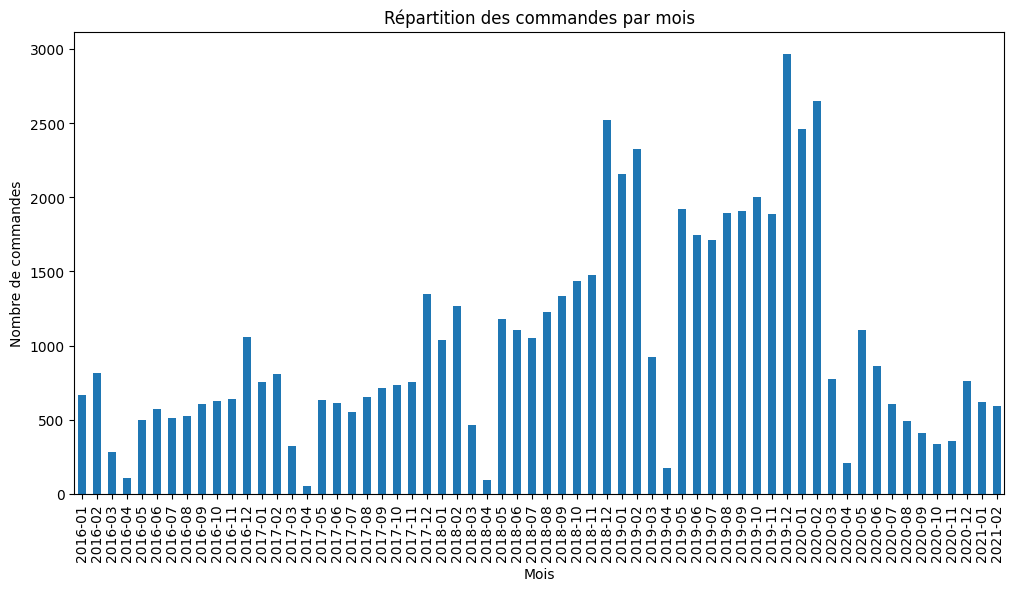

In [40]:
monthly_orders = df.groupby('Month')['order_id'].count()

plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='bar')
plt.title('Répartition des commandes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de commandes')
plt.show()

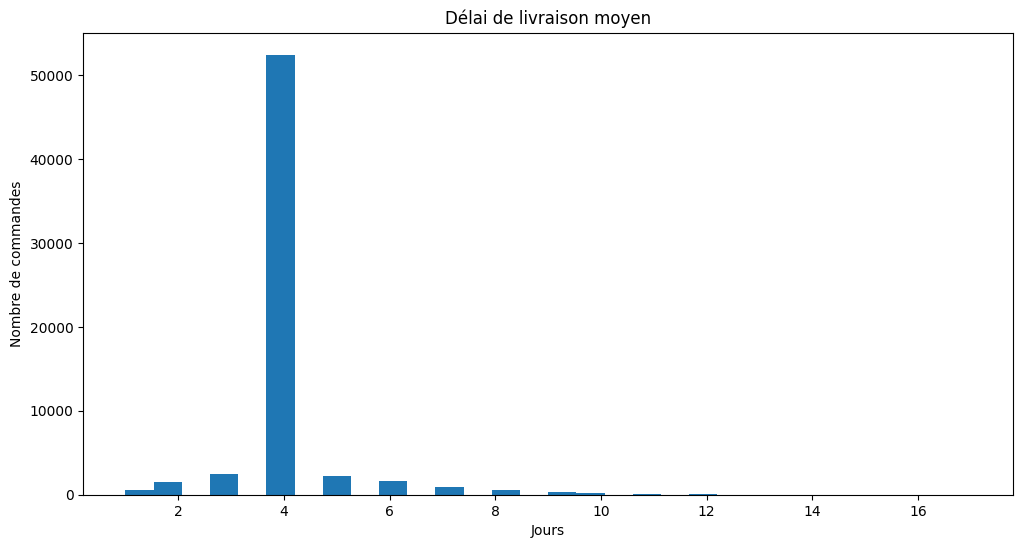

In [41]:
df['DeliveryTime'] = (df['delivery_date'] - df['order_Date']).dt.days
plt.figure(figsize=(12, 6))
df['DeliveryTime'].plot(kind='hist', bins=30)
plt.title('Délai de livraison moyen')
plt.xlabel('Jours')
plt.ylabel('Nombre de commandes')
plt.show()

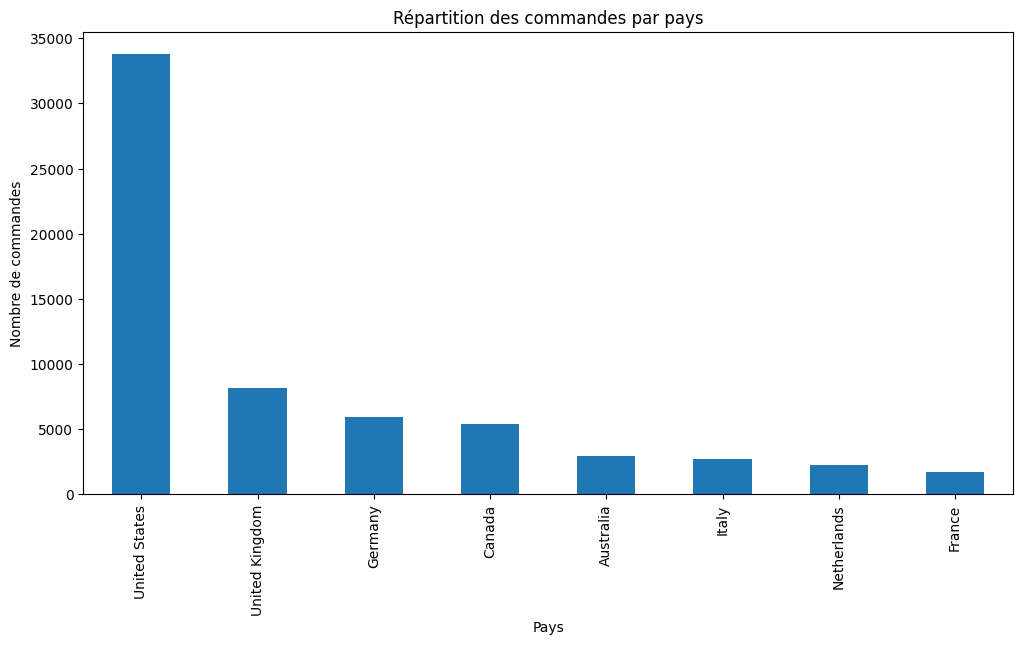

In [42]:
country_orders = df['cst_country'].value_counts()

plt.figure(figsize=(12, 6))
country_orders.plot(kind='bar')
plt.title('Répartition des commandes par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de commandes')
plt.show()

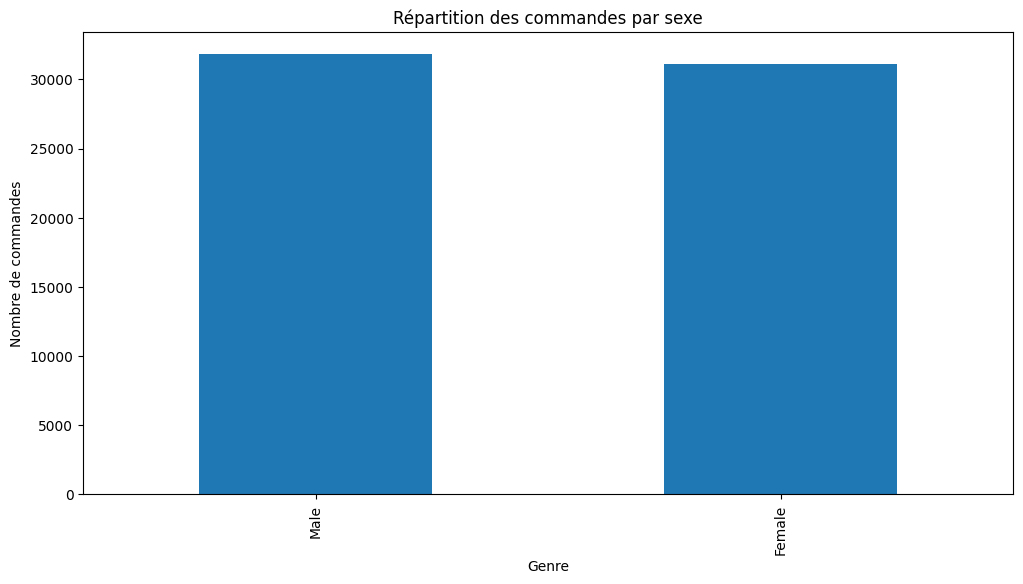

In [43]:
gender_orders = df['gender'].value_counts()

plt.figure(figsize=(12, 6))
gender_orders.plot(kind='bar')
plt.title('Répartition des commandes par sexe')
plt.xlabel('Genre')
plt.ylabel('Nombre de commandes')
plt.show()

j'ai fais un autre graphique , on va choisir entre les 2 

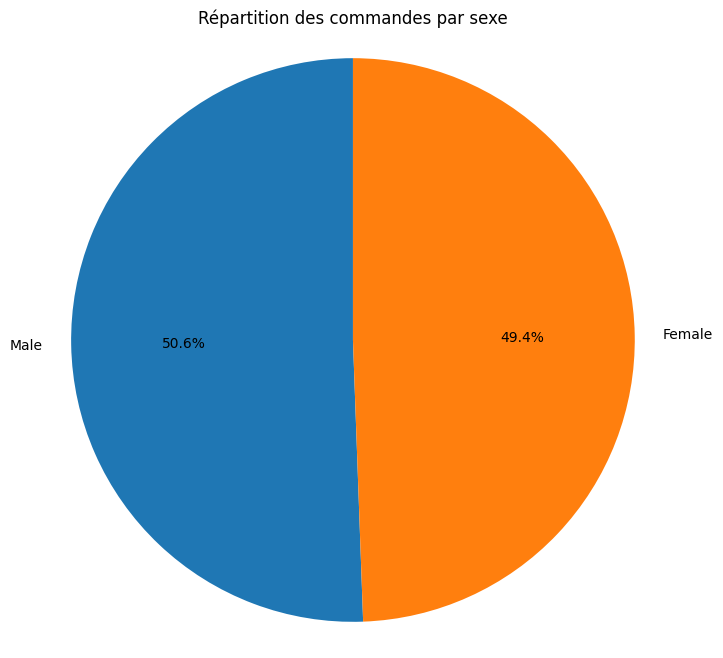

In [58]:
plt.figure(figsize=(8, 8))
plt.pie(gender_orders, labels=gender_orders.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des commandes par sexe')
plt.axis('equal')  # Pour que le diagramme soit un cercle
plt.show()

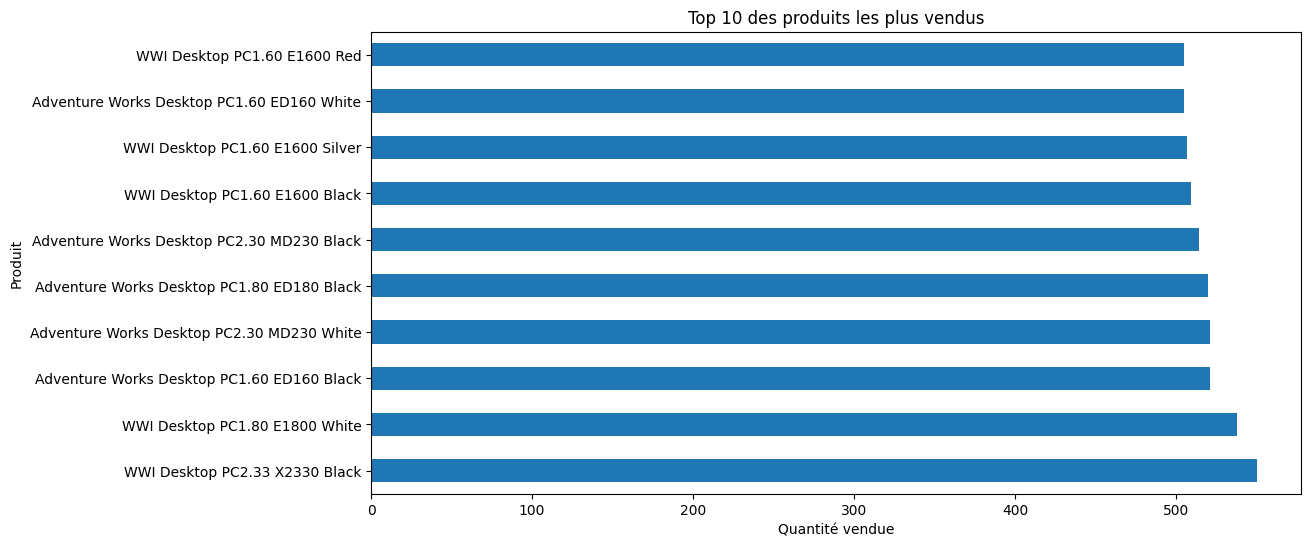

In [44]:
top_products = df.groupby('Product_name')['qtity'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='barh')
plt.title('Top 10 des produits les plus vendus')
plt.xlabel('Quantité vendue')
plt.ylabel('Produit')
plt.show()

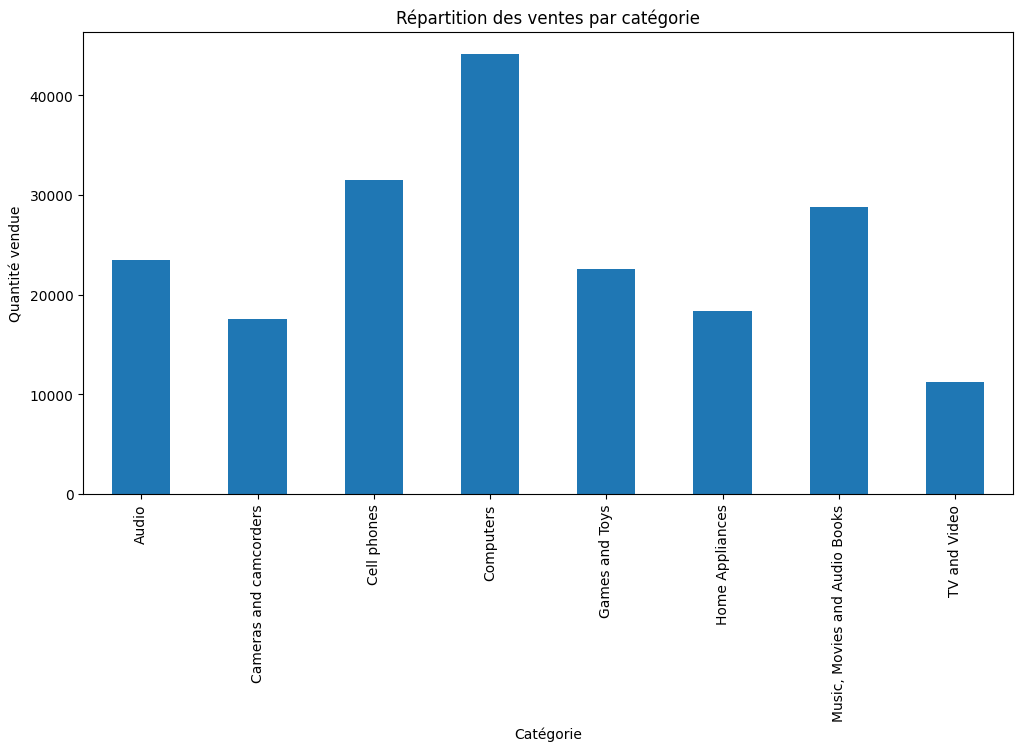

In [45]:
category_sales = df.groupby('category')['qtity'].sum()

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar')
plt.title('Répartition des ventes par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Quantité vendue')
plt.show()


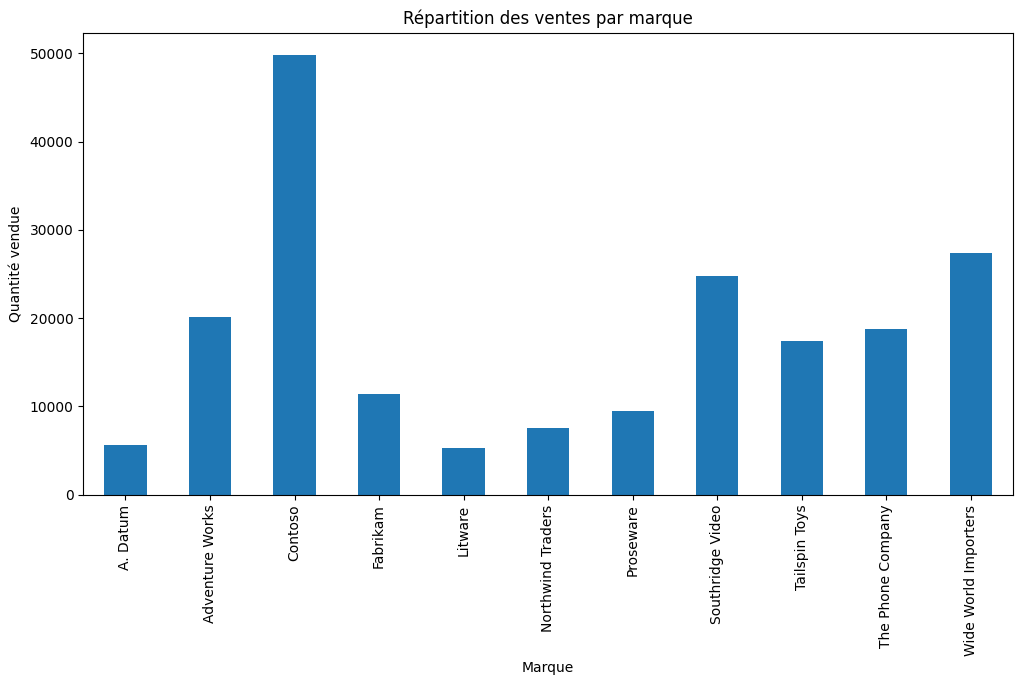

In [46]:
brand_sales = df.groupby('brand')['qtity'].sum()

plt.figure(figsize=(12, 6))
brand_sales.plot(kind='bar')
plt.title('Répartition des ventes par marque')
plt.xlabel('Marque')
plt.ylabel('Quantité vendue')
plt.show()

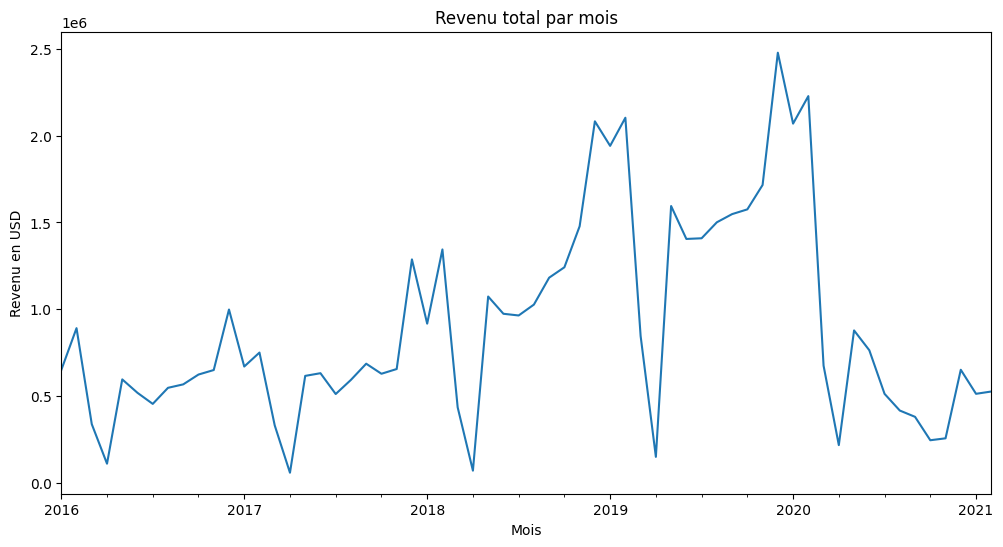

In [47]:
df['Revenue'] = df['qtity'] * df['unit_price_USD']
monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line')
plt.title('Revenu total par mois')
plt.xlabel('Mois')
plt.ylabel('Revenu en USD')
plt.show()

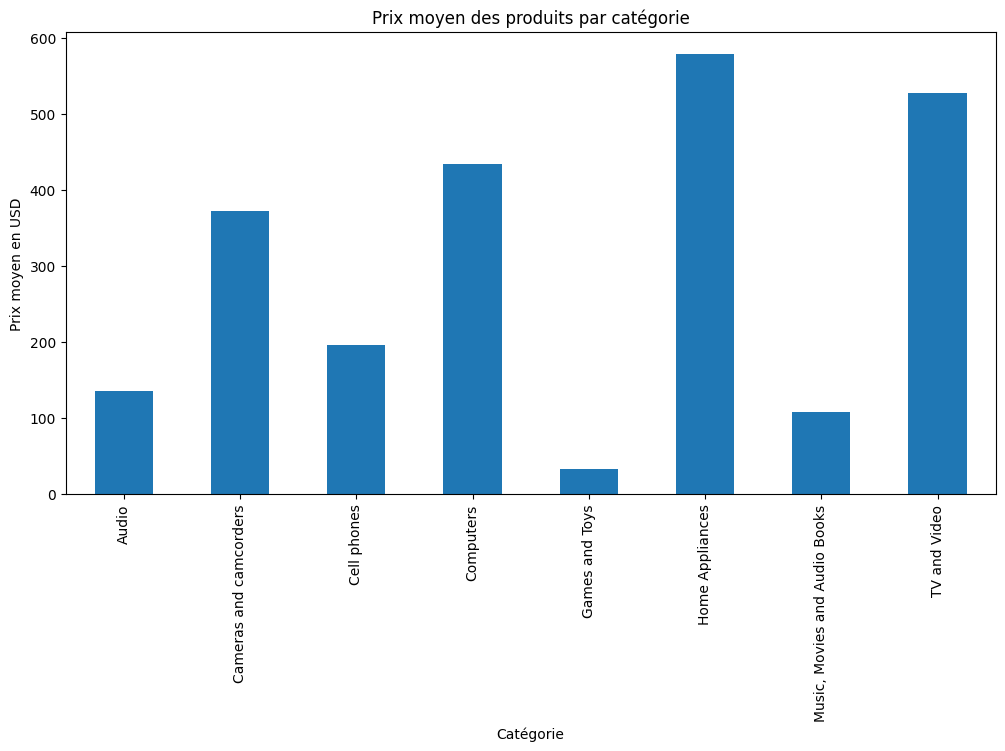

In [48]:
category_price = df.groupby('category')['unit_price_USD'].mean()

plt.figure(figsize=(12, 6))
category_price.plot(kind='bar')
plt.title('Prix moyen des produits par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen en USD')
plt.show()

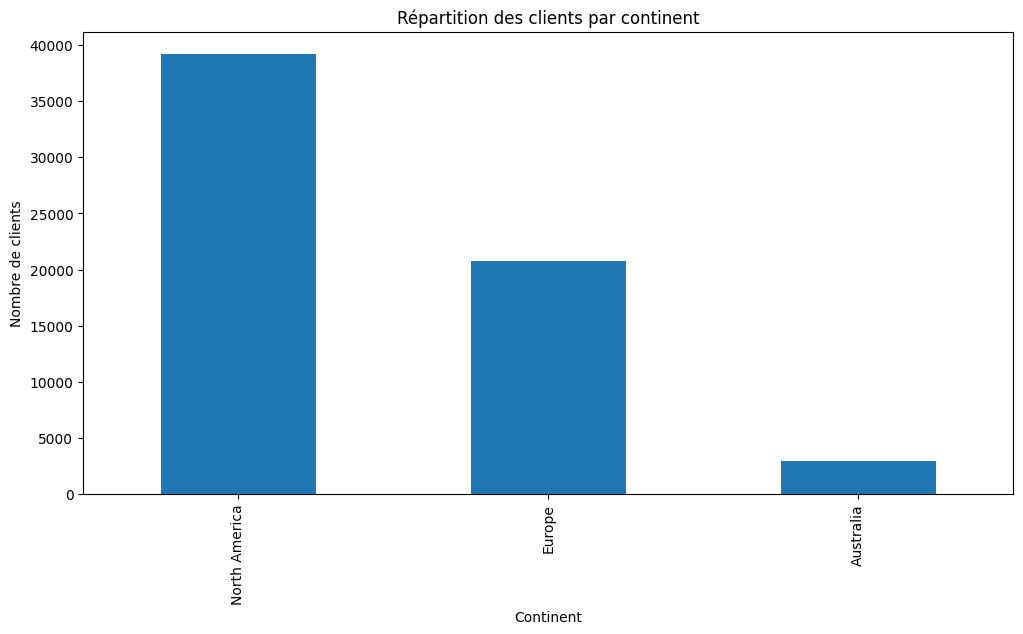

In [49]:
continent_customers = df['continent'].value_counts()

plt.figure(figsize=(12, 6))
continent_customers.plot(kind='bar')
plt.title('Répartition des clients par continent')
plt.xlabel('Continent')
plt.ylabel('Nombre de clients')
plt.show()


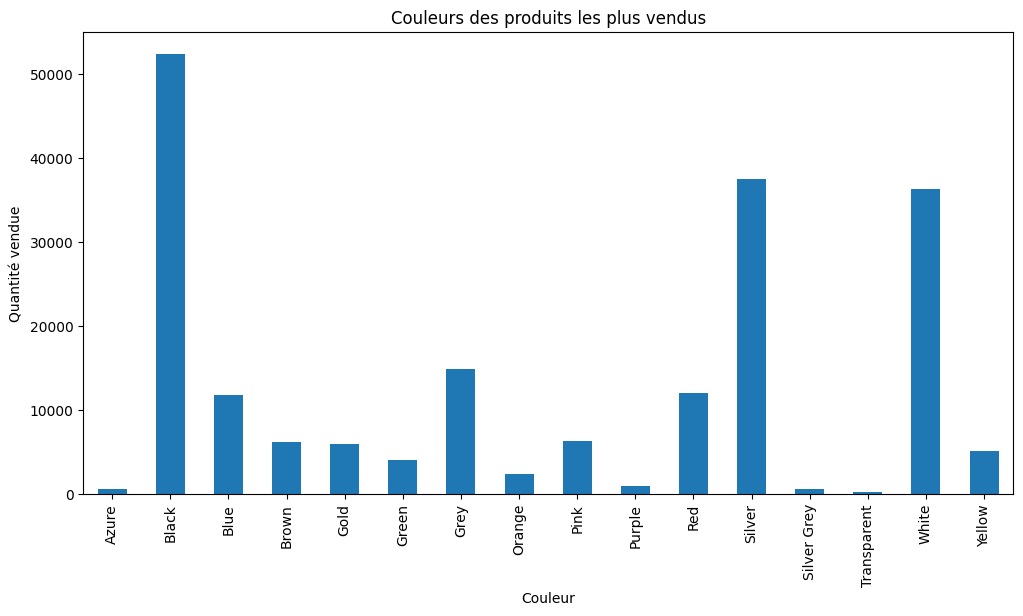

In [50]:
color_sales = df.groupby('color')['qtity'].sum()

plt.figure(figsize=(12, 6))
color_sales.plot(kind='bar')
plt.title('Couleurs des produits les plus vendus')
plt.xlabel('Couleur')
plt.ylabel('Quantité vendue')
plt.show()

In [ ]:

plt.figure(figsize=(12, 6))
df['square_meters'].plot(kind='hist', bins=30)
plt.title('Répartition des surfaces des magasins')
plt.xlabel('Mètres carrés')
plt.ylabel('Nombre de magasins')
plt.show()

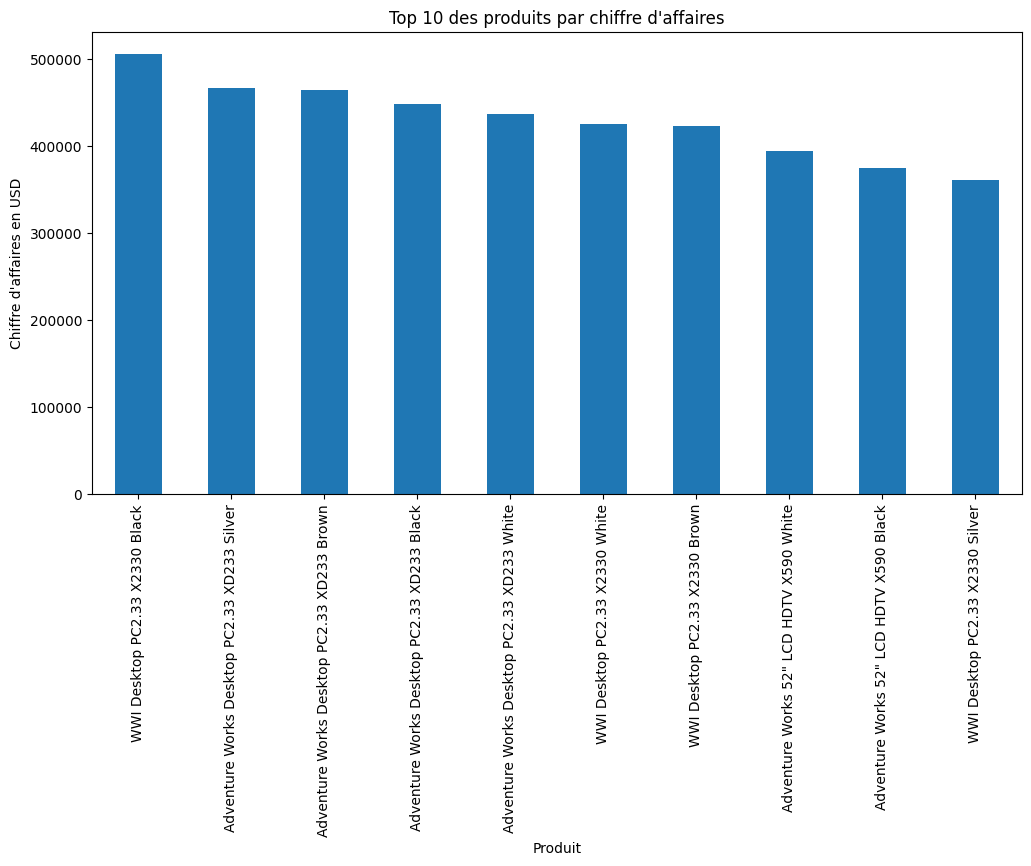

In [51]:
product_revenue = df.groupby('Product_name')['Revenue'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
product_revenue.plot(kind='bar')
plt.title('Top 10 des produits par chiffre d\'affaires')
plt.xlabel('Produit')
plt.ylabel('Chiffre d\'affaires en USD')
plt.show()

<Figure size 1200x600 with 0 Axes>

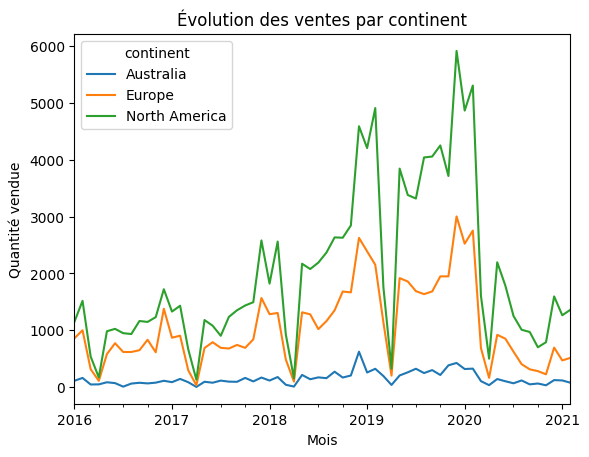

In [52]:
continent_sales = df.groupby(['Month', 'continent'])['qtity'].sum().unstack()

plt.figure(figsize=(12, 6))
continent_sales.plot()
plt.title('Évolution des ventes par continent')
plt.xlabel('Mois')
plt.ylabel('Quantité vendue')
plt.show()

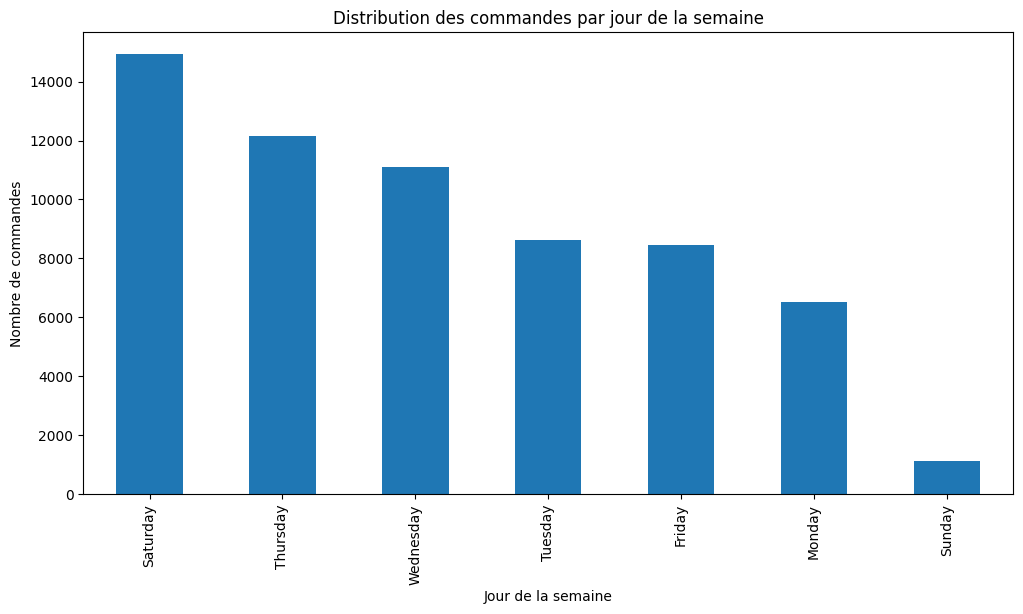

In [53]:
df['DayOfWeek'] = df['order_Date'].dt.day_name()
day_of_week_orders = df['DayOfWeek'].value_counts()

plt.figure(figsize=(12, 6))
day_of_week_orders.plot(kind='bar')
plt.title('Distribution des commandes par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de commandes')
plt.show()

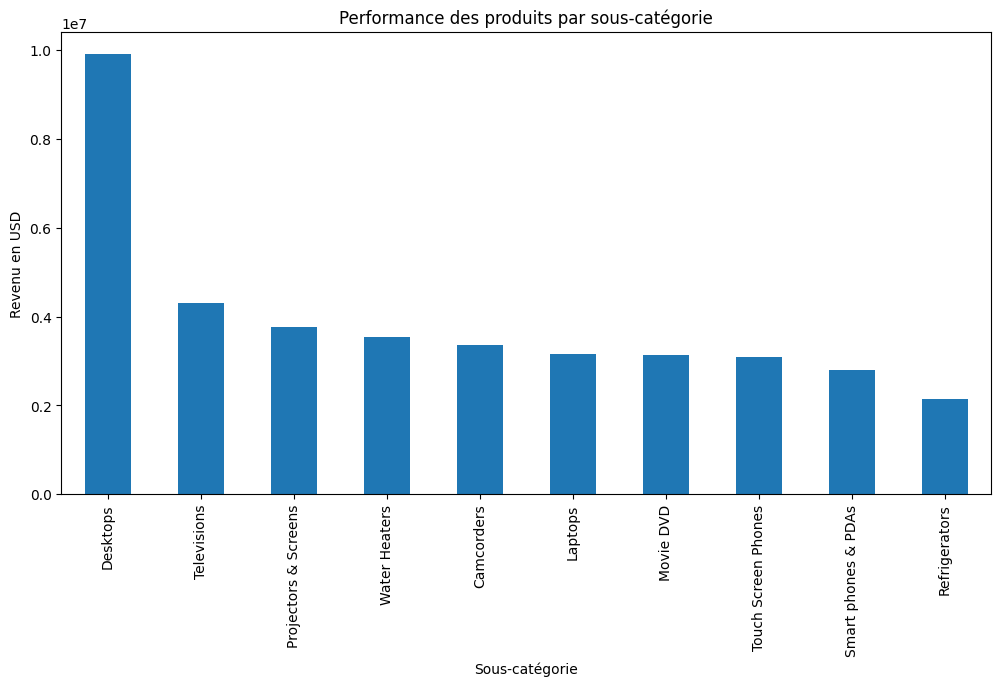

In [54]:
subcategory_performance = df.groupby('subcategory')['Revenue'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
subcategory_performance.plot(kind='bar')
plt.title('Performance des produits par sous-catégorie')
plt.xlabel('Sous-catégorie')
plt.ylabel('Revenu en USD')
plt.show()